In [50]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

dir_path = "Chessboard"
dir_path = dir_path + "/test" + str(0)
file_list = os.listdir(dir_path)

black_list = []
white_list = []

black_sigma_list = []
white_sigma_list = []

for file_name in file_list:

    file_path = os.path.join(dir_path, file_name)
    image = cv2.imread(file_path)
    if image is None:
        print("image does not exit")
        
    image = image[100:600, 400:1000]

    pattern_size = (9, 9)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    found, corners = cv2.findChessboardCorners(gray, pattern_size, None)

    if not found:
        print("Chessboard Corner not Found")

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)

    corners = sorted(corners, key=lambda x: (x[0][0], x[0][1]))
    corners = np.asarray(corners)

    x, y = corners[0][0]
    x = int(x)
    y = int(y)
    r = 10
    image_local = image[y-r:y+r+1, x-r:x+r+1]
    gray_local = gray[y-r:y+r+1, x-r:x+r+1]

    # plt.imshow(gray_local)
    # plt.colorbar()
    gray_local = gray_local.reshape(-1)

    data = gray_local
    data = data.reshape(-1, 1)

    # 创建GMM对象
    gmm = cv2.ml.EM_create()

    # 设置GMM参数
    gmm.setClustersNumber(3)  # 设置高斯分布的数量
    gmm.setCovarianceMatrixType(cv2.ml.EM_COV_MAT_DIAGONAL)  # 设置协方差矩阵类型

    # 拟合数据
    gmm.trainEM(data)

    # 获取拟合结果
    means = gmm.getMeans()
    covs = gmm.getCovs()
    weights = gmm.getWeights()

    # 可视化结果
    x = np.linspace(0, 255, 1000)
    y = np.zeros_like(x)

    for i in range(len(means)):
        mean = means[i][0]
        cov = covs[i][0]
        weight = weights[0][i]
        y += weight * np.exp(-0.5 * ((x - mean) / np.sqrt(cov)) ** 2) / np.sqrt(2 * np.pi * cov)
    
    white, index = max((value, index) for index, value in enumerate(means))
    white_list.append(white)
    white_sigma_list.append(covs[i][0][0])

    black, index = min((value, index) for index, value in enumerate(means))
    black_list.append(black)
    black_sigma_list.append(covs[i][0][0])

    # plt.plot(x, y, label='GMM Fit')
    # plt.hist(data, bins=50, density=True, alpha=0.5, label='Data Histogram')
    # plt.xlabel('X')
    # plt.ylabel('Density')
    # plt.title('GMM Fitting Results')
    # plt.legend()
    # plt.show()

    

(array([33.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  1.,
         0.,  1.,  0.,  0.,  1.,  3.,  3.,  2.,  2.,  3.,  6.,  3.,  4.,
        13., 10., 11., 16., 17., 19., 19., 16., 24., 31., 19., 25., 29.,
        27., 29., 22., 22., 22., 15., 13., 14., 10.,  7.,  7.,  4.,  2.,
         3.,  3.,  3.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([2.17014881e-01, 1.82310678e+01, 3.62451208e+01, 5.42591737e+01,
        7.22732266e+01, 9.02872796e+01, 1.08301333e+02, 1.26315385e+02,
        1.44329438e+02, 1.62343491e+02, 1.80357544e+02, 1.98371597e+02,
        2.16385650e+02, 2.34399703e+02, 2.52413756e+02, 2.70427809e+02,
        2.88441862e+02, 3.06455915e+02, 3.24469968e+02, 3.42484021e+02,
        3.60498074e+02, 3.78512127e+02, 3.96526179e+02, 4.14540232e+02,
  

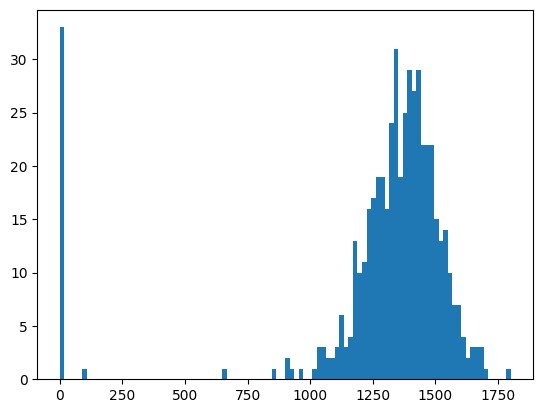

In [54]:
plt.hist(white_sigma_list, bins=100)

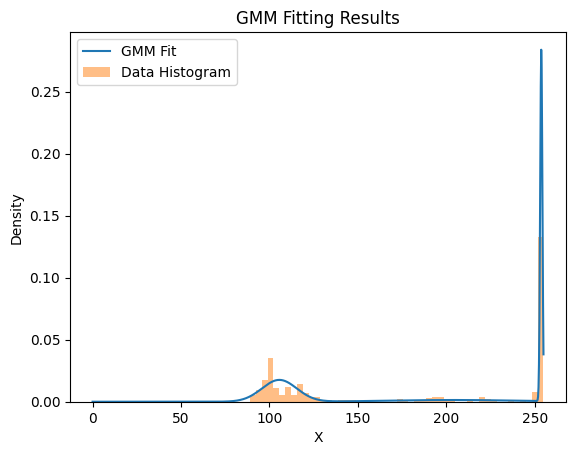

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

file_path = "Chessboard/test0/frame0000.jpg"
image = cv2.imread(file_path)
if image is None:
    print("image does not exit")
    
image = image[100:600, 400:1000]

pattern_size = (9, 9)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

found, corners = cv2.findChessboardCorners(gray, pattern_size, None)

if not found:
    print("Chessboard Corner not Found")

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)

corners = sorted(corners, key=lambda x: (x[0][0], x[0][1]))
corners = np.asarray(corners)

x, y = corners[0][0]
x = int(x)
y = int(y)
r = 10
image_local = image[y-r:y+r+1, x-r:x+r+1]
gray_local = gray[y-r:y+r+1, x-r:x+r+1]

# plt.imshow(gray_local)
# plt.colorbar()
gray_local = gray_local.reshape(-1)

# 生成一些示例数据
data = gray_local
data = data.reshape(-1, 1)

# 创建GMM对象
gmm = cv2.ml.EM_create()

# 设置GMM参数
gmm.setClustersNumber(3)  # 设置高斯分布的数量
gmm.setCovarianceMatrixType(cv2.ml.EM_COV_MAT_DIAGONAL)  # 设置协方差矩阵类型

# 拟合数据
gmm.trainEM(data)

# 获取拟合结果
means = gmm.getMeans()
covs = gmm.getCovs()
weights = gmm.getWeights()

# 可视化结果
x = np.linspace(0, 255, 1000)
y = np.zeros_like(x)

for i in range(len(means)):
    mean = means[i][0]
    cov = covs[i][0]
    weight = weights[0][i]
    y += weight * np.exp(-0.5 * ((x - mean) / np.sqrt(cov)) ** 2) / np.sqrt(2 * np.pi * cov)


plt.plot(x, y, label='GMM Fit')
plt.hist(data, bins=50, density=True, alpha=0.5, label='Data Histogram')
plt.xlabel('X')
plt.ylabel('Density')
plt.title('GMM Fitting Results')
plt.legend()
plt.show()